In [116]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy import signal
import pprint
from sklearn import preprocessing
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import time
import seaborn as sns
import matplotlib.cm as cm
import statsmodels as sm
import pickle

In [117]:
# weight_type = 'ff100'
weight_type = 'ons'

In [118]:
with open('data/GB/region_names/iso_names.txt', mode='r') as f:
    regions = f.read().splitlines()
    
name_to_omit = ['London, City of', 'Isles of Scily']

regions = [r.replace(' ', '_') for r in regions if r not in name_to_omit]
metrics = ['newCasesBySpecimenDate', 'newDeaths28DaysByDeathDate']

dfs = {}
for r in regions:
    for m in metrics:
        if m == metrics[0]:
            clinical = pd.read_csv('data/GB/regional/clinical/{}/{}.csv'.format(m, r), keep_default_na=False, na_values=[''])
            clinical = clinical.dropna(how='any').drop(['Unnamed: 0', 'areaType'], axis=1)
            clinical['date'] = pd.to_datetime(clinical['date'])
            clinical = clinical.set_index('date')
        else:
            try:
                tmp = pd.read_csv('data/GB/regional/clinical/{}/{}.csv'.format(m, r), keep_default_na=False, na_values=[''])
            except Exception as exc:
                break
            tmp['date'] = pd.to_datetime(tmp['date'])
            tmp = tmp.set_index('date')
#             clinical = pd.concat([clinical, tmp[m]], axis=1)
            clinical = pd.merge(clinical, tmp[m], left_index=True, right_index=True, how='outer')

    idx = clinical.columns.get_loc('nhsName')+1
    if list(clinical.columns.values[idx:]) != metrics:
        continue
    searches = pd.read_csv('data/GB/regional/searches/{}.csv'.format(r), keep_default_na=False, na_values=[''])
    searches = searches.drop(['country_region_code', 'country_region', 'sub_region_1', 'sub_region_1_code', 'sub_region_2', 'sub_region_2_code', 'place_id'], axis=1)
    searches['date'] = pd.to_datetime(searches['date'])
#         if r == 'Hackney':
#             tmp = pd.read_csv('data/GB/regional/searches/{}.csv'.format('London,_City_of'), keep_default_na=False, na_values=[''])
#             tmp = tmp.drop(['country_region_code', 'country_region', 'sub_region_1', 'sub_region_1_code', 'sub_region_2', 'sub_region_2_code', 'place_id'], axis=1)
#             tmp['date'] = pd.to_datetime(tmp['date'].astype(str))
#             idx = searches.columns.get_loc('date')+1
#             print(searches.iloc[:, idx:])
#             searches = pd.concat([searches.iloc[:, :idx], searches.iloc[:, idx:].add(tmp.iloc[:, idx:], fill_value=0.0)])
    df = pd.merge(clinical, searches, on='date', how='outer').iloc[::-1].sort_values(by=['date'])
    df = df.set_index('date')
    dfs[r.replace('_', ' ')] = df
print(len(dfs))
dfs['Aberdeen City']

189


,isoCode,areaCode,parentCode,isoName,googleName,nhsName,newCasesBySpecimenDate,newDeaths28DaysByDeathDate,symptom:Abdominal obesity,symptom:Abdominal pain,...,symptom:Wart,symptom:Water retention,symptom:Weakness,symptom:Weight gain,symptom:Wheeze,symptom:Xeroderma,symptom:Xerostomia,symptom:Yawn,symptom:hyperhidrosis,symptom:pancreatitis
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.19,5.14,...,1.28,NaN,NaN,2.64,NaN,2.85,NaN,NaN,NaN,NaN
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.66,5.02,...,1.59,NaN,0.95,3.77,NaN,3.31,NaN,NaN,NaN,NaN
2019-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.27,5.70,...,1.55,NaN,0.79,3.10,NaN,3.24,0.62,NaN,0.7,NaN
2019-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.79,4.42,...,1.29,NaN,NaN,3.04,NaN,2.93,NaN,NaN,NaN,NaN
2019-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.95,4.86,...,1.29,NaN,NaN,3.38,NaN,3.08,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-13,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,81.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-14,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,59.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-15,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,54.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
for i, key in enumerate(dfs.keys()):
    dfs[key] = dfs[key].loc[:'2022-05-19']
dfs['Aberdeen City']

,isoCode,areaCode,parentCode,isoName,googleName,nhsName,newCasesBySpecimenDate,newDeaths28DaysByDeathDate,symptom:Abdominal obesity,symptom:Abdominal pain,...,symptom:Wart,symptom:Water retention,symptom:Weakness,symptom:Weight gain,symptom:Wheeze,symptom:Xeroderma,symptom:Xerostomia,symptom:Yawn,symptom:hyperhidrosis,symptom:pancreatitis
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.19,5.14,...,1.28,NaN,NaN,2.64,NaN,2.85,NaN,NaN,NaN,NaN
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.66,5.02,...,1.59,NaN,0.95,3.77,NaN,3.31,NaN,NaN,NaN,NaN
2019-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.27,5.70,...,1.55,NaN,0.79,3.10,NaN,3.24,0.62,NaN,0.70,NaN
2019-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.79,4.42,...,1.29,NaN,NaN,3.04,NaN,2.93,NaN,NaN,NaN,NaN
2019-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.95,4.86,...,1.29,NaN,NaN,3.38,NaN,3.08,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-15,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,42.0,0.0,4.78,7.79,...,2.28,NaN,NaN,4.16,NaN,4.13,NaN,NaN,1.12,NaN
2022-05-16,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,57.0,0.0,3.27,7.90,...,1.33,NaN,NaN,3.80,NaN,3.80,NaN,NaN,1.33,NaN
2022-05-17,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,44.0,0.0,3.38,6.82,...,2.06,NaN,NaN,4.84,NaN,3.56,NaN,NaN,0.96,NaN


In [120]:
# tmp = None
# for i, key in enumerate(dfs.keys()):
#     if i == 0:
#         tmp = pd.DataFrame(dfs[key].loc[:, 'newCasesBySpecimenDate':'newDeaths28DaysByDeathDate'].isnull().any(axis=1).values, columns=[key])
#     else:
#         tmp = pd.concat([tmp, pd.DataFrame(dfs[key].loc[:, 'newCasesBySpecimenDate':'newDeaths28DaysByDeathDate'].isnull().any(axis=1).values, columns=[key])], axis=1)

In [121]:
columns = dfs['Aberdeen City'].columns[:dfs['Aberdeen City'].columns.get_loc('nhsName')+1].values
for key in dfs.keys():
    for c in columns:
        dfs[key][c] = dfs[key][c].fillna(dfs[key][c].iloc[500])
dfs['Aberdeen City']

/var/folders/16/p0_pv93912d7zzx29sykqy800000gn/T/ipykernel_59062/2140708226.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[key][c] = dfs[key][c].fillna(dfs[key][c].iloc[500])


,isoCode,areaCode,parentCode,isoName,googleName,nhsName,newCasesBySpecimenDate,newDeaths28DaysByDeathDate,symptom:Abdominal obesity,symptom:Abdominal pain,...,symptom:Wart,symptom:Water retention,symptom:Weakness,symptom:Weight gain,symptom:Wheeze,symptom:Xeroderma,symptom:Xerostomia,symptom:Yawn,symptom:hyperhidrosis,symptom:pancreatitis
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,NaN,NaN,2.19,5.14,...,1.28,NaN,NaN,2.64,NaN,2.85,NaN,NaN,NaN,NaN
2019-01-02,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,NaN,NaN,2.66,5.02,...,1.59,NaN,0.95,3.77,NaN,3.31,NaN,NaN,NaN,NaN
2019-01-03,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,NaN,NaN,3.27,5.70,...,1.55,NaN,0.79,3.10,NaN,3.24,0.62,NaN,0.70,NaN
2019-01-04,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,NaN,NaN,2.79,4.42,...,1.29,NaN,NaN,3.04,NaN,2.93,NaN,NaN,NaN,NaN
2019-01-05,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,NaN,NaN,2.95,4.86,...,1.29,NaN,NaN,3.38,NaN,3.08,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-15,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,42.0,0.0,4.78,7.79,...,2.28,NaN,NaN,4.16,NaN,4.13,NaN,NaN,1.12,NaN
2022-05-16,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,57.0,0.0,3.27,7.90,...,1.33,NaN,NaN,3.80,NaN,3.80,NaN,NaN,1.33,NaN
2022-05-17,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,44.0,0.0,3.38,6.82,...,2.06,NaN,NaN,4.84,NaN,3.56,NaN,NaN,0.96,NaN


In [122]:
if weight_type == 'ff100':
    symptoms = ["Anosmia", "Arthralgia", "Clouding of consciousness", "Cough", "Diarrhea", "Fatigue", "Fever", "Headache", "Myalgia", 
            "Nausea", "Nosebleed", "Rhinitis", "Shortness of breath", "Skin rash", "Sore throat", "Vomiting",] 
    
elif weight_type == 'ons':
    # symptoms = ["Abdominal pain",  "Ageusia", "Anosmia", "Chills", "Cluster headache", "Cough", "Diarrhea", "Dysgeusia", 
    #             "Fatigue", "Fever", "Headache", "Low-grade fever", "Myalgia", "Nausea", "Rhinitis", "Shallow breathing", "Shortness of breath", 
    #             "Sore throat", "Throat irritation", "Vomiting", ] 
#     symptoms = ["Abdominal pain",  "Ageusia", "Anosmia", "Chills", "Cluster headache", "Cough", "Diarrhea", "Dysgeusia", 
#                 "Fatigue", "Fever", "Headache", "Low-grade fever", "Myalgia", "Nausea", "Rhinitis", "Shallow breathing", "Shortness of breath", 
#                 "Sore throat", "Throat irritation", "Vomiting", "Weakness", ] 
#     symptoms = ["Ageusia", "Anosmia", "Cough", "Diarrhea", "Fatigue", "Fever", "Headache",  "Myalgia", "Nausea", "Rhinitis", 
#                 "Shortness of breath", "Sore throat", "Vomiting", ] 
#     symptoms = ["Ageusia", "Anosmia", "Cough", "Diarrhea", "Fatigue", "Fever", "Headache",  "Myalgia", "Nausea", 
#                 "Shortness of breath", "Sore throat", "Vomiting", ] 
    symptoms = ["Abdominal pain",  "Ageusia", "Anosmia", "Cough", "Diarrhea", "Fatigue", "Fever", "Headache", "Myalgia", "Nausea", 
                "Shortness of breath", "Sore throat", "Vomiting", "Weakness", ] 
#     symptoms = ["Ageusia", "Anosmia", "Cough", "Diarrhea", "Fatigue", "Fever", "Headache",  "Myalgia", "Nausea", 
#                 "Shortness of breath", "Sore throat", ] 
symptoms = ['symptom:' + s for s in symptoms]

In [123]:
column = df.columns.get_loc(metrics[-1])+1
for key in dfs.keys():
    dfs[key] = pd.concat([dfs[key].iloc[:, :column], dfs[key][symptoms]], axis=1)
dfs['Aberdeen City']

,isoCode,areaCode,parentCode,isoName,googleName,nhsName,newCasesBySpecimenDate,newDeaths28DaysByDeathDate,symptom:Abdominal pain,symptom:Ageusia,...,symptom:Diarrhea,symptom:Fatigue,symptom:Fever,symptom:Headache,symptom:Myalgia,symptom:Nausea,symptom:Shortness of breath,symptom:Sore throat,symptom:Vomiting,symptom:Weakness
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,NaN,NaN,5.14,NaN,...,4.83,4.03,3.47,4.31,NaN,1.77,1.01,2.71,3.72,NaN
2019-01-02,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,NaN,NaN,5.02,NaN,...,3.80,5.82,3.37,3.77,NaN,2.11,0.77,3.00,3.31,0.95
2019-01-03,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,NaN,NaN,5.70,NaN,...,4.54,6.32,4.12,4.43,0.59,2.00,NaN,2.76,3.92,0.79
2019-01-04,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,NaN,NaN,4.42,NaN,...,4.31,6.21,4.14,4.51,NaN,2.30,0.78,3.71,3.65,NaN
2019-01-05,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,NaN,NaN,4.86,NaN,...,4.49,6.06,3.51,4.92,0.68,2.19,NaN,1.66,2.65,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-15,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,42.0,0.0,7.79,NaN,...,7.42,8.51,5.87,6.95,0.94,2.50,0.94,4.42,5.36,NaN
2022-05-16,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,57.0,0.0,7.90,NaN,...,7.87,8.75,4.83,5.16,0.62,3.06,1.33,3.33,5.25,NaN
2022-05-17,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,44.0,0.0,6.82,NaN,...,6.37,10.10,4.78,5.71,0.96,2.99,1.52,4.21,4.60,NaN


In [124]:
idx = clinical.columns.get_loc(metrics[-1])+1
nans = []
for key in dfs.keys():  
    nans.append((len(dfs[key]) - np.array([dfs[key][c].isnull().sum() for c in dfs[key].columns[idx:]]))/len(dfs[key]))
search_stats = pd.DataFrame(nans, index=dfs.keys(), columns=symptoms)
search_stats.describe()

,symptom:Abdominal pain,symptom:Ageusia,symptom:Anosmia,symptom:Cough,symptom:Diarrhea,symptom:Fatigue,symptom:Fever,symptom:Headache,symptom:Myalgia,symptom:Nausea,symptom:Shortness of breath,symptom:Sore throat,symptom:Vomiting,symptom:Weakness
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
mean,0.985926,0.043738,0.088829,0.985408,0.984320,0.987978,0.983493,0.984495,0.678534,0.966647,0.837723,0.965936,0.979984,0.563636
std,0.108826,0.123344,0.187300,0.107109,0.116659,0.094250,0.116319,0.115964,0.406435,0.150058,0.278949,0.143831,0.127910,0.416779
min,0.076113,0.000000,0.000000,0.127126,0.058300,0.195951,0.072065,0.069636,0.000000,0.006478,0.000000,0.014575,0.017004,0.000000
25%,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.417814,0.999190,0.778138,0.998381,1.000000,0.000000
50%,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.924696,1.000000,0.985425,1.000000,1.000000,0.757895
75%,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.995951,1.000000,0.999190,1.000000,1.000000,0.961943
max,1.000000,0.592713,0.702834,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [125]:
nulls = {}
names= {}
for c in dfs[key].columns[idx:]:
    cnt = 0
    names[c] = []
    for key in dfs.keys():
        if dfs[key][c].isnull().sum() == len(dfs[key]):
            cnt += 1
        else:
            names[c].append(key) 
    nulls[c] = cnt
print(len(dfs))
print(nulls)
print(names['symptom:Anosmia'])

189
{'symptom:Abdominal pain': 0, 'symptom:Ageusia': 163, 'symptom:Anosmia': 151, 'symptom:Cough': 0, 'symptom:Diarrhea': 0, 'symptom:Fatigue': 0, 'symptom:Fever': 0, 'symptom:Headache': 0, 'symptom:Myalgia': 45, 'symptom:Nausea': 0, 'symptom:Shortness of breath': 12, 'symptom:Sore throat': 0, 'symptom:Vomiting': 0, 'symptom:Weakness': 60}
['Barnet', 'Birmingham', 'Bournemouth, Christchurch and Poole', 'Bradford', 'Bromley', 'Cambridgeshire', 'Derbyshire', 'Devon', 'Ealing', 'Essex', 'Glasgow City', 'Gloucestershire', 'Hampshire', 'Hertfordshire', 'Kent', 'Kirklees', 'Lambeth', 'Lancashire', 'Leeds', 'Leicestershire', 'Lincolnshire', 'Liverpool', 'Manchester', 'Newham', 'Norfolk', 'North Yorkshire', 'Northamptonshire', 'Nottinghamshire', 'Oxfordshire', 'Sheffield', 'Southwark', 'Suffolk', 'Surrey', 'Tower Hamlets', 'Wandsworth', 'Warwickshire', 'West Sussex', 'Westminster']


In [126]:
column = dfs['Aberdeen City'].columns.get_loc('newCasesBySpecimenDate')
for key in dfs.keys():
    dfs[key].iloc[:, column:]= dfs[key].iloc[:, column:].fillna(0)
dfs['Aberdeen City']

,isoCode,areaCode,parentCode,isoName,googleName,nhsName,newCasesBySpecimenDate,newDeaths28DaysByDeathDate,symptom:Abdominal pain,symptom:Ageusia,...,symptom:Diarrhea,symptom:Fatigue,symptom:Fever,symptom:Headache,symptom:Myalgia,symptom:Nausea,symptom:Shortness of breath,symptom:Sore throat,symptom:Vomiting,symptom:Weakness
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,0.0,0.0,5.14,0.0,...,4.83,4.03,3.47,4.31,0.00,1.77,1.01,2.71,3.72,0.00
2019-01-02,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,0.0,0.0,5.02,0.0,...,3.80,5.82,3.37,3.77,0.00,2.11,0.77,3.00,3.31,0.95
2019-01-03,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,0.0,0.0,5.70,0.0,...,4.54,6.32,4.12,4.43,0.59,2.00,0.00,2.76,3.92,0.79
2019-01-04,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,0.0,0.0,4.42,0.0,...,4.31,6.21,4.14,4.51,0.00,2.30,0.78,3.71,3.65,0.00
2019-01-05,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,0.0,0.0,4.86,0.0,...,4.49,6.06,3.51,4.92,0.68,2.19,0.00,1.66,2.65,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-15,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,42.0,0.0,7.79,0.0,...,7.42,8.51,5.87,6.95,0.94,2.50,0.94,4.42,5.36,0.00
2022-05-16,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,57.0,0.0,7.90,0.0,...,7.87,8.75,4.83,5.16,0.62,3.06,1.33,3.33,5.25,0.00
2022-05-17,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,44.0,0.0,6.82,0.0,...,6.37,10.10,4.78,5.71,0.96,2.99,1.52,4.21,4.60,0.00


In [127]:
population_stats = pd.read_excel('data/GB/population/ukpopestimatesmid2020on2021geography.xls', sheet_name=6, header=7) 
population_region = set(population_stats['Name'])
populations = {}
for key in dfs.keys():
    if key == 'Belfast City':
        populations[key] = float(population_stats[population_stats['Name']=='Belfast']['All ages'].values[0])
    elif key == 'Derry and Strabane':
        populations[key] = float(population_stats[population_stats['Name']=='Derry City and Strabane']['All ages'].values[0])
    elif key == 'Durham, County':
        populations[key] = float(population_stats[population_stats['Name']=='County Durham']['All ages'].values[0])
    elif key == 'Edinburgh, City of':
        populations[key] = float(population_stats[population_stats['Name']=='City of Edinburgh']['All ages'].values[0])
    elif key == 'Eilean Siar':
        populations[key] = float(population_stats[population_stats['Name']=='Na h-Eileanan Siar']['All ages'].values[0])
    elif key == 'Herefordshire':
        populations[key] = float(population_stats[population_stats['Name']=='Herefordshire, County of']['All ages'].values[0])
    elif key == 'Kingston upon Hull':
        populations[key] = float(population_stats[population_stats['Name']=='Kingston upon Hull, City of']['All ages'].values[0])
    elif key == 'Mid-Ulster':
        populations[key] = float(population_stats[population_stats['Name']=='Mid Ulster']['All ages'].values[0])
    elif key == 'Rhondda Cynon Taff':
        populations[key] = float(population_stats[population_stats['Name']=='Rhondda Cynon Taf']['All ages'].values[0])
    elif key == 'Northamptonshire':
        populations[key] = 757000
    else:
        populations[key] = float(population_stats[population_stats['Name']==key]['All ages'].values[0])

In [128]:
idx = dfs['Aberdeen City'].columns.get_loc('nhsName')+1
for key in dfs.keys():
    dfs[key].insert(idx, 'population', populations[key])

In [129]:
idx = dfs['Aberdeen City'].columns.get_loc('newCasesBySpecimenDate')+1
for key in dfs.keys():
    dfs[key].insert(idx, 'cumCasesBySpecimenDate', dfs[key]['newCasesBySpecimenDate'].cumsum())
dfs['Aberdeen City']

,isoCode,areaCode,parentCode,isoName,googleName,nhsName,population,newCasesBySpecimenDate,cumCasesBySpecimenDate,newDeaths28DaysByDeathDate,...,symptom:Diarrhea,symptom:Fatigue,symptom:Fever,symptom:Headache,symptom:Myalgia,symptom:Nausea,symptom:Shortness of breath,symptom:Sore throat,symptom:Vomiting,symptom:Weakness
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,229060.0,0.0,0.0,0.0,...,4.83,4.03,3.47,4.31,0.00,1.77,1.01,2.71,3.72,0.00
2019-01-02,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,229060.0,0.0,0.0,0.0,...,3.80,5.82,3.37,3.77,0.00,2.11,0.77,3.00,3.31,0.95
2019-01-03,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,229060.0,0.0,0.0,0.0,...,4.54,6.32,4.12,4.43,0.59,2.00,0.00,2.76,3.92,0.79
2019-01-04,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,229060.0,0.0,0.0,0.0,...,4.31,6.21,4.14,4.51,0.00,2.30,0.78,3.71,3.65,0.00
2019-01-05,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,229060.0,0.0,0.0,0.0,...,4.49,6.06,3.51,4.92,0.68,2.19,0.00,1.66,2.65,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-15,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,229060.0,42.0,71628.0,0.0,...,7.42,8.51,5.87,6.95,0.94,2.50,0.94,4.42,5.36,0.00
2022-05-16,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,229060.0,57.0,71685.0,0.0,...,7.87,8.75,4.83,5.16,0.62,3.06,1.33,3.33,5.25,0.00
2022-05-17,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,229060.0,44.0,71729.0,0.0,...,6.37,10.10,4.78,5.71,0.96,2.99,1.52,4.21,4.60,0.00


In [130]:
idx = dfs['Aberdeen City'].columns.get_loc('cumCasesBySpecimenDate')+1
for key in dfs.keys():
    dfs[key].insert(idx, 'cumCasesPerPopulation', dfs[key]['cumCasesBySpecimenDate']/dfs[key]['population'])
dfs['Aberdeen City']

,isoCode,areaCode,parentCode,isoName,googleName,nhsName,population,newCasesBySpecimenDate,cumCasesBySpecimenDate,cumCasesPerPopulation,...,symptom:Diarrhea,symptom:Fatigue,symptom:Fever,symptom:Headache,symptom:Myalgia,symptom:Nausea,symptom:Shortness of breath,symptom:Sore throat,symptom:Vomiting,symptom:Weakness
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,229060.0,0.0,0.0,0.000000,...,4.83,4.03,3.47,4.31,0.00,1.77,1.01,2.71,3.72,0.00
2019-01-02,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,229060.0,0.0,0.0,0.000000,...,3.80,5.82,3.37,3.77,0.00,2.11,0.77,3.00,3.31,0.95
2019-01-03,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,229060.0,0.0,0.0,0.000000,...,4.54,6.32,4.12,4.43,0.59,2.00,0.00,2.76,3.92,0.79
2019-01-04,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,229060.0,0.0,0.0,0.000000,...,4.31,6.21,4.14,4.51,0.00,2.30,0.78,3.71,3.65,0.00
2019-01-05,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,229060.0,0.0,0.0,0.000000,...,4.49,6.06,3.51,4.92,0.68,2.19,0.00,1.66,2.65,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-15,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,229060.0,42.0,71628.0,0.312704,...,7.42,8.51,5.87,6.95,0.94,2.50,0.94,4.42,5.36,0.00
2022-05-16,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,229060.0,57.0,71685.0,0.312953,...,7.87,8.75,4.83,5.16,0.62,3.06,1.33,3.33,5.25,0.00
2022-05-17,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,229060.0,44.0,71729.0,0.313145,...,6.37,10.10,4.78,5.71,0.96,2.99,1.52,4.21,4.60,0.00


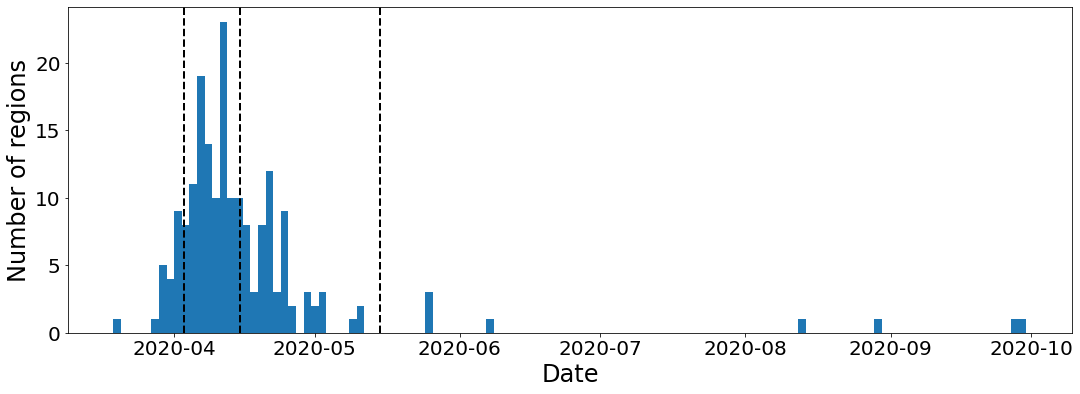

In [276]:
rate = 0.001
time_span = ['2020-02-01', '2022-05-15']
p1 = datetime.datetime(2020,4,3)
p2 = datetime.datetime(2020,4,15)
p3 = datetime.datetime(2020,5,15)
timeline = {}
for key in dfs.keys():
    if len(dfs[key].loc[time_span[0]:time_span[1]][dfs[key]['cumCasesPerPopulation'].loc[time_span[0]:time_span[1]]>=rate]) > 0:
        timeline[key] = dfs[key].loc[time_span[0]:time_span[1]][dfs[key]['cumCasesPerPopulation'].loc[time_span[0]:time_span[1]]>=rate].index[0]
plt.figure(figsize=(18, 6))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Number of regions', fontsize=24)
plt.xlabel('Date', fontsize=24)
plt.hist(timeline.values(), bins=120, rwidth=10)
plt.axvline(p1, ymin=0, ymax=df[metric].max(), color='black', linestyle='--', lw=2, label='')
plt.axvline(p2, ymin=0, ymax=df[metric].max(), color='black', linestyle='--', lw=2, label='')
plt.axvline(p3, ymin=0, ymax=df[metric].max(), color='black', linestyle='--', lw=2, label='')
plt.savefig('images/region_hist_long.pdf')

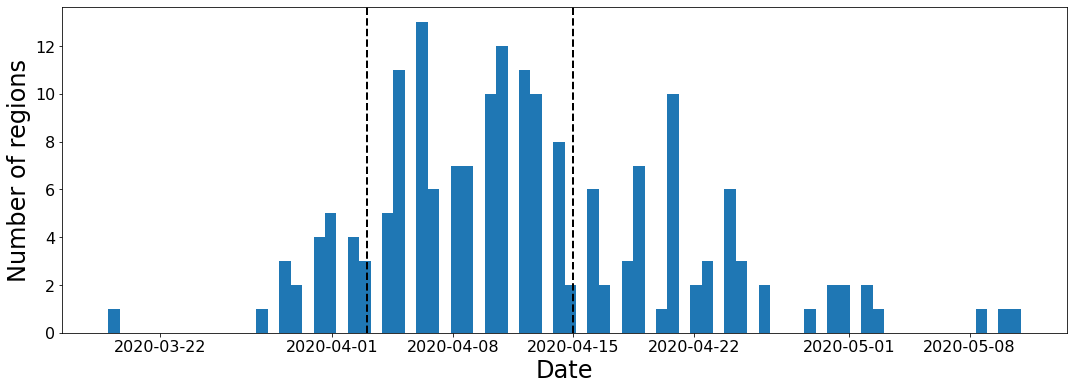

In [273]:
rate = 0.001
time_span = ['2020-02-01', '2020-05-15']
p1 = datetime.datetime(2020,4,3)
p2 = datetime.datetime(2020,4,15)
timeline = {}
for key in dfs.keys():
    if len(dfs[key].loc[time_span[0]:time_span[1]][dfs[key]['cumCasesPerPopulation'].loc[time_span[0]:time_span[1]]>=rate]) > 0:
        timeline[key] = dfs[key].loc[time_span[0]:time_span[1]][dfs[key]['cumCasesPerPopulation'].loc[time_span[0]:time_span[1]]>=rate].index[0]
plt.figure(figsize=(18, 6))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('Number of regions', fontsize=24)
plt.xlabel('Date', fontsize=24)
plt.hist(timeline.values(), bins=80, rwidth=10)
plt.axvline(p1, ymin=0, ymax=df[metric].max(), color='black', linestyle='--', lw=2, label='')
plt.axvline(p2, ymin=0, ymax=df[metric].max(), color='black', linestyle='--', lw=2, label='')
plt.savefig('images/region_hist.pdf')

In [277]:
group1=[]
group2=[]
group3=[]
split1 = datetime.datetime(2020,4,3)
split2 = datetime.datetime(2020,4,15)
split3 = datetime.datetime(2020,5,16)
for key in timeline.keys():
    if timeline[key] <= split1:
        group1.append(key)
    elif timeline[key] <= split2:
        group2.append(key)
    elif timeline[key] >= split3:
        continue
    else:
        group3.append(key)

In [133]:
symptom_class = {}
if weight_type == 'ff100':
    classes = ["Loss of the sense of smell", "Joint ache", "Altered consciousness", "Cough", "Diarrhea", "Fatigue", "Fever", "Headache", 
           "Muscle ache", "Nausea", "Nose bleed", "Runny nose", "Shortness of breath", "Rash", "Sore throat", "Vomiting", ] 

elif weight_type == 'ons':
    # classes = ["Abdominal pain",  "Loss of taste",  "Loss of smell",  "Fatigue weakness",  "Headache", "Cough", "Diarrhea", 
    #             "Loss of taste", "Fatigue weakness", "Fever", "Headache", "Fever", "Muscle ache myalgia", 
    #             "Nausea vomiting", "Runny nose", "Shortness of breath", "Shortness of breath", "Sore throat", "Sore throat", 
    #              "Nausea vomiting", ] 
#     classes = ["Abdominal pain",  "Loss of taste",  "Loss of smell",  "Fatigue weakness",  "Headache", "Cough", "Diarrhea", 
#                 "Loss of taste", "Fatigue weakness", "Fever", "Headache", "Fever", "Muscle ache myalgia", 
#                 "Nausea vomiting", "Runny nose", "Shortness of breath", "Shortness of breath", "Sore throat", "Sore throat", 
#                  "Nausea vomiting", "Fatigue weakness", ] 
#     classes = ["Loss of taste", "Loss of smell", "Cough", "Diarrhea", "Fatigue weakness", "Fever", "Headache", "Muscle ache myalgia", 
#                "Nausea vomiting", "Runny nose", "Shortness of breath", "Sore throat", "Nausea vomiting",  ] 
#     classes = ["Loss of taste", "Loss of smell", "Cough", "Diarrhea", "Fatigue weakness", "Fever", "Headache", "Muscle ache myalgia", 
#                "Nausea vomiting", "Shortness of breath", "Sore throat", "Nausea vomiting",  ] 
    classes = ["Abdominal pain",  "Loss of taste", "Loss of smell", "Cough", "Diarrhea", "Fatigue weakness", "Fever", "Headache", 
               "Muscle ache myalgia", "Nausea vomiting", "Shortness of breath", "Sore throat", "Nausea vomiting",  "Fatigue weakness", ] 
#     classes = ["Loss of taste", "Loss of smell", "Cough", "Diarrhea", "Fatigue weakness", "Fever", "Headache", "Muscle ache myalgia", 
#                "Nausea vomiting", "Shortness of breath", "Sore throat",  ] 
for s, c in zip(symptoms, classes):
    symptom_class[s] = c
symptom_class 

{'symptom:Abdominal pain': 'Abdominal pain',
 'symptom:Ageusia': 'Loss of taste',
 'symptom:Anosmia': 'Loss of smell',
 'symptom:Cough': 'Cough',
 'symptom:Diarrhea': 'Diarrhea',
 'symptom:Fatigue': 'Fatigue weakness',
 'symptom:Fever': 'Fever',
 'symptom:Headache': 'Headache',
 'symptom:Myalgia': 'Muscle ache myalgia',
 'symptom:Nausea': 'Nausea vomiting',
 'symptom:Shortness of breath': 'Shortness of breath',
 'symptom:Sore throat': 'Sore throat',
 'symptom:Vomiting': 'Nausea vomiting',
 'symptom:Weakness': 'Fatigue weakness'}

In [134]:
for key in dfs.keys():
    df_copy = dfs[key].copy()
    column = dfs[key].columns.get_loc(symptoms[0])
    df = dfs[key].iloc[:, :column]
    
    class_set = list(set(classes))
    for c in class_set:
        df = pd.concat([df, pd.Series(np.zeros(len(df)), index=df.index, name=c)], axis=1)

    for c in class_set:
        for s in symptoms:
            if symptom_class[s] == c:
                df[c] = df[c] + df_copy[s]
    dfs[key] = df
dfs['Aberdeen City']

,isoCode,areaCode,parentCode,isoName,googleName,nhsName,population,newCasesBySpecimenDate,cumCasesBySpecimenDate,cumCasesPerPopulation,...,Cough,Fatigue weakness,Shortness of breath,Diarrhea,Sore throat,Fever,Nausea vomiting,Loss of smell,Abdominal pain,Headache
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,229060.0,0.0,0.0,0.000000,...,8.37,4.03,1.01,4.83,2.71,3.47,5.49,0.0,5.14,4.31
2019-01-02,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,229060.0,0.0,0.0,0.000000,...,7.96,6.77,0.77,3.80,3.00,3.37,5.42,0.0,5.02,3.77
2019-01-03,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,229060.0,0.0,0.0,0.000000,...,9.05,7.11,0.00,4.54,2.76,4.12,5.92,0.0,5.70,4.43
2019-01-04,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,229060.0,0.0,0.0,0.000000,...,9.34,6.21,0.78,4.31,3.71,4.14,5.95,0.0,4.42,4.51
2019-01-05,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,229060.0,0.0,0.0,0.000000,...,7.97,6.06,0.00,4.49,1.66,3.51,4.84,0.0,4.86,4.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-15,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,229060.0,42.0,71628.0,0.312704,...,6.95,8.51,0.94,7.42,4.42,5.87,7.86,0.0,7.79,6.95
2022-05-16,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,229060.0,57.0,71685.0,0.312953,...,7.19,8.75,1.33,7.87,3.33,4.83,8.31,0.0,7.90,5.16
2022-05-17,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,229060.0,44.0,71729.0,0.313145,...,6.67,10.10,1.52,6.37,4.21,4.78,7.59,0.0,6.82,5.71


In [135]:
column = dfs['Aberdeen City'].columns.get_loc(metrics[0])
index = dfs['Aberdeen City'].index
columns = dfs['Aberdeen City'].columns

for key in dfs.keys():
    dfs[key] = pd.concat([dfs[key].iloc[:, :column], pd.DataFrame(dfs[key].iloc[:, column:].rolling(7).mean(), index=index, columns=columns[column:])], axis=1)
dfs[key] = dfs[key].dropna(how='any')
dfs['Aberdeen City']

,isoCode,areaCode,parentCode,isoName,googleName,nhsName,population,newCasesBySpecimenDate,cumCasesBySpecimenDate,cumCasesPerPopulation,...,Cough,Fatigue weakness,Shortness of breath,Diarrhea,Sore throat,Fever,Nausea vomiting,Loss of smell,Abdominal pain,Headache
date,,,,,,,,,,,,,,,,,,,,,
2019-01-07,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,229060.0,0.000000,0.000000,0.000000,...,8.418571,6.288571,0.598571,4.405714,2.817143,3.740000,5.482857,0.0,5.032857,4.367143
2019-01-08,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,229060.0,0.000000,0.000000,0.000000,...,8.167143,6.805714,0.454286,4.371429,2.852857,3.787143,5.461429,0.0,4.951429,4.254286
2019-01-09,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,229060.0,0.000000,0.000000,0.000000,...,8.202857,6.644286,0.425714,4.475714,2.807143,3.838571,5.448571,0.0,4.951429,4.311429
2019-01-10,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,229060.0,0.000000,0.000000,0.000000,...,7.831429,6.462857,0.560000,4.430000,2.770000,3.911429,5.351429,0.0,4.690000,4.321429
2019-01-11,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,229060.0,0.000000,0.000000,0.000000,...,7.510000,6.344286,0.594286,4.388571,2.585714,3.864286,5.194286,0.0,4.797143,4.288571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-15,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,229060.0,43.714286,71510.000000,0.312189,...,7.050000,8.942857,1.241429,7.001429,3.812857,5.445714,7.527143,0.0,8.054286,5.744286
2022-05-16,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,229060.0,43.285714,71553.285714,0.312378,...,7.020000,8.681429,1.195714,7.131429,3.760000,5.355714,7.678571,0.0,8.068571,5.832857
2022-05-17,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,229060.0,43.142857,71596.428571,0.312566,...,6.895714,8.790000,1.185714,7.061429,3.760000,5.348571,7.785714,0.0,7.708571,5.870000


In [136]:
# mm_scaler = preprocessing.MinMaxScaler()
# column = dfs['Aberdeen_City'].columns.get_loc('symptom:Abdominal pain')
# index = dfs['Aberdeen_City'].index
# columns = dfs['Aberdeen_City'].columns
# for key in dfs.keys():
#     dfs[key] = pd.concat([dfs[key].iloc[:, :column], pd.DataFrame(mm_scaler.fit_transform(dfs[key].iloc[:, column:]), index=index, columns=columns[column:])], axis=1)
# dfs['Aberdeen_City']

In [137]:
weights = pd.read_excel('data/symptoms/datadownload.xlsx', sheet_name=1, index_col=None) 
weights

,Abdominal pain,Cough,Diarrhea,Fatigue weakness,Fever,Headache,Loss of smell,Loss of taste,Muscle ache myalgia,Nausea vomiting,Shortness of breath,Sore throat,No reported symptoms
0,7.315294,41.814118,6.815294,37.253529,24.429412,37.633529,18.004118,18.753529,25.725294,9.484706,14.321765,32.065294,38.638235


In [138]:
symptom_weights={}
column = df.columns.get_loc(class_set[0])

if weight_type == 'ff100':
    weights = {'Fatigue':0.709, 'Fever':0.601, 'Loss of the sense of smell':0.291, 'Nausea':0.236, 'Shortness of breath':0.404,
                   'Diarrhea':0.276, 'Muscle ache':0.509, 'Runny nose':0.325, 'Vomiting':0.087,  'Rash': 0.052,
                   'Cough':0.777, 'Nose bleed':0.06, 'Headache':0.567,  'Sore throat':0.386, 'Joint ache':0.339, 'Altered consciousness':0.068,}
    for s in df.columns[column:]:
        symptom_weights[s] = weights[s] 
    
elif weight_type == 'ons':
    weights = pd.read_excel('data/symptoms/datadownload.xlsx', sheet_name=1, index_col=None).drop(['No reported symptoms'], axis=1) 
    weights = pd.concat([weights, pd.Series([.325*100], index=weights.index, name='Runny nose')], axis=1)
    for s in df.columns[column:]:
        if s == 'Runny nose':
            symptom_weights[s] = .325*100
        elif s=='Joint ache':
            symptom_weights[s] = .339*100
        else:
            symptom_weights[s] = weights[s].values[0]

symptom_weights

{'Muscle ache myalgia': 25.725294117647056,
 'Loss of taste': 18.753529411764706,
 'Cough': 41.81411764705882,
 'Fatigue weakness': 37.25352941176472,
 'Shortness of breath': 14.321764705882355,
 'Diarrhea': 6.815294117647059,
 'Sore throat': 32.065294117647056,
 'Fever': 24.42941176470588,
 'Nausea vomiting': 9.48470588235294,
 'Loss of smell': 18.004117647058823,
 'Abdominal pain': 7.315294117647059,
 'Headache': 37.633529411764705}

In [139]:
index = dfs['Aberdeen City'].index
column = dfs['Aberdeen City'].columns.get_loc('newDeaths28DaysByDeathDate')+1
for key in dfs.keys():
    score =pd.DataFrame([np.average(row[column:], weights=list(symptom_weights.values())) for row in dfs[key].values], 
                        index=index, columns=['search_score'])
    dfs[key] = pd.concat([dfs[key],score], axis=1)
dfs['Aberdeen City']

,isoCode,areaCode,parentCode,isoName,googleName,nhsName,population,newCasesBySpecimenDate,cumCasesBySpecimenDate,cumCasesPerPopulation,...,Fatigue weakness,Shortness of breath,Diarrhea,Sore throat,Fever,Nausea vomiting,Loss of smell,Abdominal pain,Headache,search_score
date,,,,,,,,,,,,,,,,,,,,,
2019-01-07,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,229060.0,0.000000,0.000000,0.000000,...,6.288571,0.598571,4.405714,2.817143,3.740000,5.482857,0.0,5.032857,4.367143,3.899743
2019-01-08,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,229060.0,0.000000,0.000000,0.000000,...,6.805714,0.454286,4.371429,2.852857,3.787143,5.461429,0.0,4.951429,4.254286,3.929797
2019-01-09,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,229060.0,0.000000,0.000000,0.000000,...,6.644286,0.425714,4.475714,2.807143,3.838571,5.448571,0.0,4.951429,4.311429,3.921026
2019-01-10,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,229060.0,0.000000,0.000000,0.000000,...,6.462857,0.560000,4.430000,2.770000,3.911429,5.351429,0.0,4.690000,4.321429,3.838220
2019-01-11,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,229060.0,0.000000,0.000000,0.000000,...,6.344286,0.594286,4.388571,2.585714,3.864286,5.194286,0.0,4.797143,4.288571,3.748198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-15,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,229060.0,43.714286,71510.000000,0.312189,...,8.942857,1.241429,7.001429,3.812857,5.445714,7.527143,0.0,8.054286,5.744286,4.791489
2022-05-16,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,229060.0,43.285714,71553.285714,0.312378,...,8.681429,1.195714,7.131429,3.760000,5.355714,7.678571,0.0,8.068571,5.832857,4.752381
2022-05-17,GB-ABE,S12000033,GB-SCT,Aberdeen City,Aberdeen City,Aberdeen City,229060.0,43.142857,71596.428571,0.312566,...,8.790000,1.185714,7.061429,3.760000,5.348571,7.785714,0.0,7.708571,5.870000,4.748626


In [140]:
def standardisation(df, mean=None, std=None, given=False):
    if given==False:
        mean = df.mean()
        std = df.std()
    return (df-mean)/std, mean, std

def standard_inverse(df, mean, std):
    return df*std+mean

In [141]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.ar_model import AutoReg
from sklearn.preprocessing import StandardScaler

def compute_gamma(series, news, lags=2, n=56, standardise=True):
    series = pd.DataFrame(series.values, index=series.index, columns=['search_score'])
    y = series.iloc[lags:]
    x = pd.DataFrame(index=y.index, columns=[])
    for i in range(1, lags+1):
        x['ar_'+str(i)] = series.shift(i)[lags:]
    for i in range(0, lags+1):
        x['news_'+str(i)] = news.shift(i)[lags:]
    
    error1 = []
    error2 = []
    predictions_ar = []
    predictions_news = []
    gammas = {}
    gammas_process = {}
    for i in range(len(y)-n-1):
        if standardise==True:
            y_train, y_mean, y_std = standardisation(y.iloc[i:n+i])
            y_test, _, _ = standardisation(y.iloc[1+i:n+1+i], y_mean, y_std, given=True)
            x_train, x_mean, x_std = standardisation(x.iloc[i:n+i, :])
            x_test, _, _ = standardisation(x.iloc[1+i:n+1+i, :], x_mean, x_std, given=True)
            x_train = sm.add_constant(x_train)
            x_test = sm.add_constant(x_test)
        else:
            y_train = y.iloc[i:n+i]
            y_test = y.iloc[1+i:n+1+i]
            x_train = x.iloc[i:n+i, :]
            x_test = x.iloc[1+i:n+1+i, :]
            x_train = sm.add_constant(x_train)
            x_test = sm.add_constant(x_test)
        
        result_ar = sm.OLS(y_train, x_train.iloc[:, :lags+1]).fit()
        result_news = sm.OLS(y_train, x_train).fit()
        pred_ar = result_ar.predict(x_test.iloc[:, :lags+1])
        pred_news = result_news.predict(x_test)
        predictions_ar.append(pred_ar)
        predictions_news.append(pred_news)
    
        e1 = np.abs(y_test['search_score'].values - pred_ar).mean()
        e2 = np.abs(y_test['search_score'].values - pred_news).mean()     
        error1.append(e1)
        error2.append(e2)
        ratio = e2/e1
        gammas[y.index[n+i+1]] = ratio
        if ratio < 1:
            gammas_process[y.index[n+i+1]] = ratio
        else:
            gammas_process[y.index[n+i+1]] = 1.
        
    return gammas_process, gammas, error1, error2, predictions_ar, predictions_news

In [142]:
news = pd.read_csv('data/GB/news_UK.csv')
news['date'] = pd.to_datetime(news['date'].astype(str))
news = news.set_index('date')
news = news.rename(columns={'covid-news-ratio-UK': 'news'})
for key in dfs.keys():
    dfs[key] = pd.merge(dfs[key], news, on='date')

In [143]:
for key in dfs.keys():
    gammas = compute_gamma(dfs[key]['search_score'], dfs[key]['news'], lags=3, n=90, standardise=False)[0]
    gammas = pd.DataFrame(gammas.values(), index=gammas.keys(), columns=['gamma'])
    gammas.index.name = 'date'
    gammas = gammas.rolling(7).mean().dropna()
    # gammas = gammas.rolling(7).apply(stats.hmean).dropna()
    # gammas = gammas.rolling(7).apply(harmonic_mean).dropna()
    # gammas.to_csv('data/GB/media_gammas.csv')
    dfs[key] = pd.merge(dfs[key], gammas, on='date').dropna(how='any')
    dfs[key]['search_score_adj'] =  dfs[key]['search_score']*dfs[key]['gamma']
    dfs[key] = dfs[key].drop(columns=['news', 'gamma'])

In [144]:
def correlation(df, metric='newCasesBySpecimenDate', data_range=None, shift=0):
    if data_range is not None:
        start = data_range[0]
        end = data_range[1]
    else:
        start = df.index[0]
        end = df.index[-1]
    
    correl = {}
    for i in range(df.columns.get_loc(class_set[0]), len(df.columns)):
        clinical = df[metric].shift(shift).loc[start:end].dropna()
#         if np.all(list(df[df.columns[i]].values)==0):
#             correl[df.columns[i]] = 0.0
#         else:
        correl[df.columns[i]] = np.corrcoef(clinical, df[df.columns[i]].loc[clinical.index[0]:clinical.index[-1]])[0][1]

    
    return correl

In [145]:
def correl_series(df, metric='newCasesBySpecimenDate', data_range=None, shift_range=(-30, 30)):
    days = np.arange(shift_range[0], shift_range[1]+1)
    for i, d in enumerate(days):
        if i == 0:
            correl = correlation(df, metric=metric, data_range=data_range, shift=d)
            matrix = pd.DataFrame(np.round(list(correl.values()),decimals=3), index=correl.keys(), columns=[d])
        else:
            correl = correlation(df, metric=metric, data_range=data_range, shift=d)
            tmp = pd.DataFrame(np.round(list(correl.values()),decimals=3), index=correl.keys(), columns=[d])
            matrix = pd.concat([matrix, tmp], axis=1)
    
    return matrix

In [146]:
def dipict_correl_series(df, metric='newCasesBySpecimenDate', start='2020-01-01', end='2022-05-18', 
                         shift_range=(-30, 30), score='search_score'):
    plt.figure(figsize=(12, 9)) 
    matrix = correl_series(df, metric=metric, data_range=(start, end), shift_range=shift_range)
    print('Correlation of {} from {} to {}:'.format(metric, start, end))
    print('  ', 0, ':', matrix.loc[score, 0])
    print('  ', list(matrix.loc[score]).index(matrix.loc[score].max())-(shift_range[0]*-1), ':', matrix.loc[score].max())
    plt.plot(matrix.iloc[:-2].T)
    plt.plot(matrix.iloc[-2].T, color=(0.1, 0.2, 0.5))
    plt.plot(matrix.iloc[-1].T, color='black', lw=3)
    plt.legend(matrix.index)
    plt.ylabel('Correlation')
    plt.xlabel('Number of days the clinical data shifted')
    plt.title('Correlation of search score and {} by shifted days: {} to {}'.format(metric, start, end))
#     plt.savefig('images/country/correl_series/{}/{}_{}_{}.pdf'.format(weight_type, metric, start, end))
    return list(matrix.loc[score]).index(matrix.loc[score].max())-(shift_range[0]*-1)

In [147]:
def depict_series(df, metric='newCasesBySpecimenDate', start='2020-02-13', end='2022-05-18', shift=None, score='search_score'):
    start_idx  = df.index.get_loc(start)
    end_idx = df.index.get_loc(end)
    fig = plt.figure(figsize=(12, 9)) 
    ax1 = fig.add_subplot(111)
    ln1 = ax1.plot(df.index[start_idx:end_idx], df[score].iloc[start_idx:end_idx], label='Search score')
    ax2 = ax1.twinx()
    ln2 = ax2.plot(df.index[start_idx:end_idx], df[metric].iloc[start_idx:end_idx], color='red', label=metric)
    if shift is not None:
        shifted = df[metric].shift(shift).iloc[start_idx:end_idx].dropna()
        start_shifted  = df.index.get_loc(shifted.index[0])
        end_shifted = df.index.get_loc(shifted.index[-1])+1
        ax2.plot(df.index[start_shifted:end_shifted], shifted, color='red', lw=1, ls='--', label=metric + '(shifted)')
    ax1.set_xlabel("Numbers of days from {}".format(start))
    ax1.set_ylabel("Search Score")
    ax2.set_ylabel(metric)
    plt.title('Search score and {}: {} to {}'.format(metric, start, end))
    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()
    ax1.legend(h1+h2, l1+l2)
#     plt.savefig('images/country/time_series/{}/{}/{}_{}_{}.pdf'.format(weight_type, score, metric, start, end))

In [299]:
g1 = [group1, group1]
g2 = [group2, group2]
g3 = [group1, group2]
g4 = [group1, group3]
g5 = [group2, group3]
g6 = [group3, group3]
group_comb = {'g1':g1,'g2':g2,'g3':g3,'g4':g4,'g5':g5, 'g6':g6}
date = ['2020-02-13', '2020-06-30']
metric = 'newCasesBySpecimenDate'
# metric = 'newDeaths28DaysByDeathDate'
shifts= [0,-7,-14,-21,-28,-35]

regional_correls ={}
for g_key, groups in group_comb.items():
    tmp = {}
    for s in shifts:
        correls = None
        for r1 in groups[0]:
            correl = pd.DataFrame(index=[r1], columns=groups[1])
            for r2 in groups[1]:
                clinical = dfs[r2][metric].shift(s).loc[date[0]:date[1]].dropna()
                correl[r2] = np.corrcoef(clinical, dfs[r1]['search_score_adj'].loc[clinical.index[0]:clinical.index[-1]])[0][1]
            correls = pd.concat([correls, correl], axis=0)
        tmp[s]=correls
    regional_correls[g_key]=tmp

In [243]:
g = 'g6'
s = -28
print(round(regional_correls[g][s].mean().mean(),3))
print(round(regional_correls[g][s].mean().std(),3))

0.542
0.233


In [305]:
g = 'g6'
shifts= [0,-7,-14,-21,-28,-35]

results = {}
for s in shifts:
    results[s] =  str(round(regional_correls[g][s].mean().mean(),3))+' ('+str(round(regional_correls[g][s].mean().std(),3))+')'
pd.DataFrame(results.values(), index=results.keys())

,0
0,-0.356 (0.145)
-7,-0.154 (0.189)
-14,0.097 (0.228)
-21,0.326 (0.244)
-28,0.527 (0.236)
-35,0.698 (0.189)
